<a href="https://colab.research.google.com/github/tiffduong/Data_Science_Portfolio/blob/master/MSDS%20-%20Computer%20Vision/Assignment_1_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1 - Classification Model with Fashion MNIST data**

# Data Set-Up and Preprocessing

In [0]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical

In [0]:
# download fashion mnist data 
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()


In [26]:
print("Train Set Shape: {}".format(X_train.shape))
print("Test Set Shape: {}".format(X_test.shape))

Train Set Shape: (60000, 28, 28)
Test Set Shape: (10000, 28, 28)


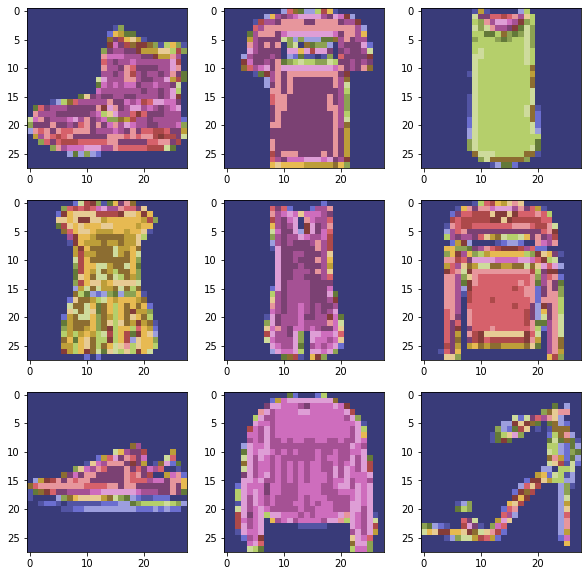

In [27]:
# plot first few images from the training set
plt.figure(figsize=(10,10))
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i], cmap=plt.get_cmap('tab20b'))
# show the figure
plt.show()


In [0]:
# preprocess data for model input
X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# normalize data so pixel values in range [0,1]
X_train = X_train / 255
X_test = X_test / 255

# Convolutional Neural Network Set-Up

In [0]:
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Flatten, Dense, BatchNormalization
from keras.models import Sequential

def create_cnn1():
  model = Sequential()

  model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(28,28, 1)))
  model.add(BatchNormalization(axis=-1))

  model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
  model.add(BatchNormalization(axis=-1))
  model.add(MaxPool2D(pool_size=(2, 2)))

  model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
  model.add(BatchNormalization(axis=-1))

  model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
  model.add(BatchNormalization(axis=-1))
  model.add(MaxPool2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  return model

In [31]:
# initialize and create a model summary
cnn1 = create_cnn1()
cnn1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_9 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_10 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_11 (Batc (None, 14, 14, 64)       

In [0]:
from keras import optimizers

# compile the model using adam's and categorical crossentropy
# use accuracy as the metric to measure model performanc

adam = optimizers.adam(lr=0.001)

cnn1.compile(loss='categorical_crossentropy',optimizer=adam, metrics=['accuracy'])

In [65]:
from keras.callbacks import EarlyStopping

callback = [EarlyStopping(monitor='val_loss', min_delta=0, 
                         patience=5, verbose=0, mode='auto', 
                         baseline=None, restore_best_weights=False)]

#define the number of epochs and batch size
epochs = 20
batch = 64

#fit the model
model = cnn1.fit(X_train, y_train, epochs=epochs, batch_size=batch, callbacks=callback, verbose=1, validation_data=(X_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 153us/step - loss: 0.0222 - acc: 0.9920 - val_loss: 0.4263 - val_acc: 0.9225
Epoch 2/20
60000/60000 [==============================] - 9s 153us/step - loss: 0.0181 - acc: 0.9938 - val_loss: 0.4536 - val_acc: 0.9249
Epoch 3/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.0198 - acc: 0.9932 - val_loss: 0.4586 - val_acc: 0.9227
Epoch 4/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.0207 - acc: 0.9930 - val_loss: 0.4781 - val_acc: 0.9256
Epoch 5/20
60000/60000 [==============================] - 9s 153us/step - loss: 0.0147 - acc: 0.9947 - val_loss: 0.4466 - val_acc: 0.9257
Epoch 6/20
60000/60000 [==============================] - 9s 153us/step - loss: 0.0188 - acc: 0.9942 - val_loss: 0.4881 - val_acc: 0.9238


# Model Evaluation

In [66]:
evaluate = cnn1.evaluate(X_test, y_test, verbose=1)

print("Model Validation Accuracy: {} %".format((round(evaluate[1], 4) * 100)))

10000/10000 [==============================] - 1s 77us/step
Model Validation Accuracy: 92.38 %


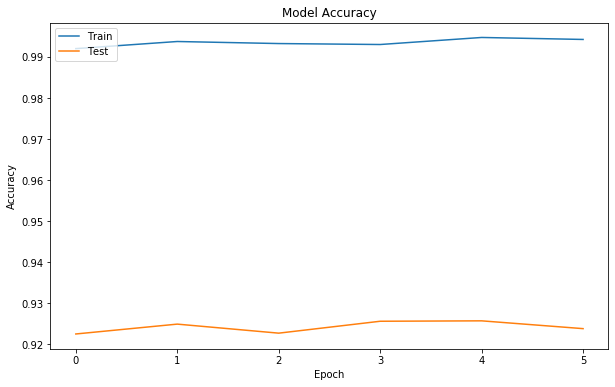

In [71]:
#graph model accuracy
plt.figure(figsize=(10,6))
plt.plot(model.history['acc'])
plt.plot(model.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

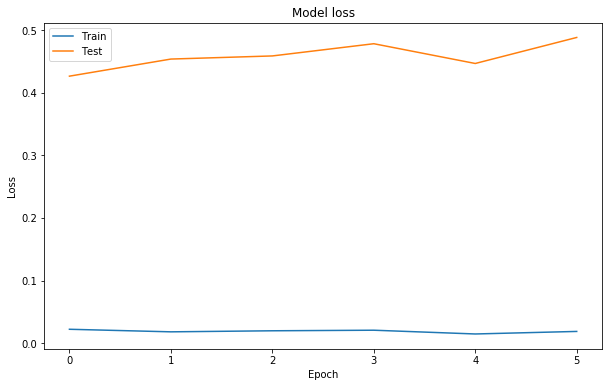

In [70]:
# graph model loss
plt.figure(figsize=(10,6))
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()